<a href="https://colab.research.google.com/github/EkZosuls/DeepLearningOfCochlearPartitionImages/blob/main/LAZRhelpers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io as sio
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/  sample_data/


In [ ]:
basePathName = "/content/drive/MyDrive/coch_data/"

fftReconFile = "2012_03_22_mu307_20120322T114453_ssxcorr_64_IHCSS_y_L1_FFTreconRAW"
#print(basePathName + fftReconFile)
fftReconContents = sio.loadmat(basePathName + fftReconFile, squeeze_me=True)
for i in range(len(fftReconContents['myROI'])):
  print(len(fftReconContents['myROI']))
  print(fftReconContents['myROI'][i].item())
dog = fftReconContents['myROI'][0].item()
xCenter = dog[6]
yCenter = dog[7]
dx = dog[4]
dy =dog[5]
print(xCenter)

In [ ]:
# A class that loads and parses the information in a Laura style FFTReconRaw file
class getFFTAnalysisData():
  def __init__(self, filePath, filename):
    self.fftReconContents = sio.loadmat(filePath + filename, squeeze_me=True)
    self.numROIs = len(fftReconContents['myROI'])
    print(self.numROIs)
    #self.MYROI = fftReconContents['myROI'][0].item()

  def getROICoords(self, indexx):
    try:
      dog = self.fftReconContents['myROI'][indexx].item()

    except ValueError as err:
      print("ROI range not valid")
    return dog[6], dog[7], dog[4], dog[5]

  def getROItype(self, indexx):
    dog = self.fftReconContents['myROI'][indexx].item()
    return dog[0]

  def getFFTmagY(self):
    dog = self.fftReconContents['data'].item()
    doog = np.array(dog, dtype=object)
    print(doog[1].shape)
    return doog[1]

  def getFrequencies(self):
    dog = self.fftReconContents['data'].item()
    doog = np.array(dog, dtype=object)
    return doog[4]


In [ ]:
mu307 = getFFTAnalysisData(basePathName, fftReconFile)

27


In [ ]:
mu307.getROICoords(8)
#print(mu307.getROICoords(8))
#print(mu307.getROItype(8))

(569, 189, 64, 64)

In [ ]:
var = mu307.getFrequencies()
print(var)

[10000  1000    10 12000 15000  1500 18000 20000  2000  2500   250  3000
  3500  4000  4500  5000   500    50  5500  6000  6500  7000]


In [ ]:
!pip install awscli

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 547 kB 44.4 MB/s 
  Attempting uninstall: rsa
    Found existing installation: rsa 4.8
    Uninstalling rsa-4.8:
      Successfully uninstalled rsa-4.8
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install boto3

     |████████████████████████████████| 132 kB 5.7 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 8.7 MB 40.9 MB/s 
     |████████████████████████████████| 138 kB 53.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import boto3

BUCKET_NAME = 'gerbilstrobe' # replace with your bucket name

# enter authentication credentials
s3 = boto3.resource('s3', aws_access_key_id = 'VWR', 
                          aws_secret_access_key= '53ix')

In [ ]:
! aws configure

AWS Access Key ID [****************WVWR]: 
AWS Secret Access Key [****************53ix]: 
Default region name [None]: 
Default output format [None]: 


In [ ]:
! aws s3 ls s3://gerbilstrobe/2012_03_22_mu307/20120322T114453/L1/ --recursive

2022-04-05 22:10:56     112909 2012_03_22_mu307/20120322T114453/L1/2012_03_22_mu307_20120322T114453_ssxcorr_64_IHCSS_y_L1_FFTreconRAW.mat
2022-04-05 22:24:05    3840146 2012_03_22_mu307/20120322T114453/L1/F10/Image_F10HzP000L1S20120322T114453.tif
2022-04-05 22:23:41    3840146 2012_03_22_mu307/20120322T114453/L1/F10/Image_F10HzP045L1S20120322T114453.tif
2022-04-05 22:24:17    3840146 2012_03_22_mu307/20120322T114453/L1/F10/Image_F10HzP090L1S20120322T114453.tif
2022-04-05 22:23:55    3840146 2012_03_22_mu307/20120322T114453/L1/F10/Image_F10HzP135L1S20120322T114453.tif
2022-04-05 22:23:59    3840146 2012_03_22_mu307/20120322T114453/L1/F10/Image_F10HzP180L1S20120322T114453.tif
2022-04-05 22:23:46    3840146 2012_03_22_mu307/20120322T114453/L1/F10/Image_F10HzP225L1S20120322T114453.tif
2022-04-05 22:24:12    3840146 2012_03_22_mu307/20120322T114453/L1/F10/Image_F10HzP270L1S20120322T114453.tif
2022-04-05 22:23:50    3840146 2012_03_22_mu307/20120322T114453/L1/F10/Image_F10HzP315L1S20120322T1

In [ ]:
for bucket in s3.buckets.all(): print(bucket.name)

gerbilstrobe


In [ ]:
KEY = '2012_03_22_mu307/20120322T114453/L1/F10/Image_F10HzP000L1S20120322T114453.tif'

s3.Bucket(BUCKET_NAME).download_file(KEY, 'Image_F10HzP000L1S20120322T114453.tif')

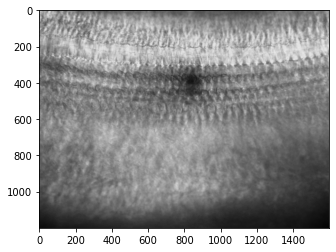

In [ ]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
im = Image.open('Image_F10HzP000L1S20120322T114453.tif')



plt.imshow(im, cmap='gray')

In [ ]:
# get ground truth data

#open a list of sxxcorr files

# use these files to run the RAFT from their filname list

# y_mvmt is the ground truth for the cross correlation with 16 x oversampling.

#since RAFT works on a pixel basis we can average the vertical displacement across the entire ROI to make a fair comparison

# Then send this to the fft algorithm to fit to a sinusoid.

# make a class to do this the class will import the number of frequencies in a level and the prefix of the sxxycorr files , make a list of sxxycorr files, make a list of image files for each frequency

#make a function that inputs these lists and uses the objects to run the algorithm.

